In [1]:
import pandas as pd
from sklearn import metrics
import numpy as np
import json
import requests
import glob
import statistics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading all the csv files
df1 = pd.read_csv("F:\DS\MDTM20\VS Code\Singapore\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("F:\DS\MDTM20\VS Code\Singapore\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("F:\DS\MDTM20\VS Code\Singapore\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("F:\DS\MDTM20\VS Code\Singapore\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("F:\DS\MDTM20\VS Code\Singapore\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
182350,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63 years 01 month
182351,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years
182352,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months
182353,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62 years 08 months


In [5]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928558 entries, 0 to 182354
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                928558 non-null  object 
 1   town                 928558 non-null  object 
 2   flat_type            928558 non-null  object 
 3   block                928558 non-null  object 
 4   street_name          928558 non-null  object 
 5   storey_range         928558 non-null  object 
 6   floor_area_sqm       928558 non-null  float64
 7   flat_model           928558 non-null  object 
 8   lease_commence_date  928558 non-null  int64  
 9   resale_price         928558 non-null  float64
 10  remaining_lease      219508 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 85.0+ MB


In [7]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [8]:
df['flat_type'].value_counts()

flat_type
4 ROOM              352955
3 ROOM              296331
5 ROOM              195771
EXECUTIVE            69768
2 ROOM               11885
1 ROOM                1304
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [9]:
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [10]:
df['flat_type'].value_counts()

flat_type
4 ROOM              352955
3 ROOM              296331
5 ROOM              195771
EXECUTIVE            69768
2 ROOM               11885
1 ROOM                1304
MULTI GENERATION       544
Name: count, dtype: int64

In [11]:
df['town'].value_counts()

town
TAMPINES           80083
YISHUN             70172
JURONG WEST        66783
BEDOK              66722
WOODLANDS          65621
ANG MO KIO         52140
HOUGANG            50842
BUKIT BATOK        44507
CHOA CHU KANG      38402
BUKIT MERAH        34426
PASIR RIS          33252
SENGKANG           32577
TOA PAYOH          31588
QUEENSTOWN         28805
GEYLANG            28210
CLEMENTI           28070
BUKIT PANJANG      27732
KALLANG/WHAMPOA    27239
JURONG EAST        24818
SERANGOON          22857
BISHAN             21283
PUNGGOL            20746
SEMBAWANG          13894
MARINE PARADE       8046
CENTRAL AREA        7158
BUKIT TIMAH         2521
LIM CHU KANG          64
Name: count, dtype: int64

In [12]:
df['storey_range'].value_counts()

storey_range
04 TO 06    232963
07 TO 09    210469
01 TO 03    186635
10 TO 12    179118
13 TO 15     62163
16 TO 18     24236
19 TO 21     11469
22 TO 24      7456
25 TO 27      3452
01 TO 05      2700
06 TO 10      2474
28 TO 30      1649
11 TO 15      1259
31 TO 33       636
34 TO 36       582
37 TO 39       510
16 TO 20       265
40 TO 42       247
21 TO 25        92
43 TO 45        65
46 TO 48        53
26 TO 30        39
49 TO 51        17
36 TO 40         7
31 TO 35         2
Name: count, dtype: int64

In [13]:
df['flat_model'].value_counts()

flat_model
Model A                   195296
Improved                  168589
New Generation            110262
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46935
Simplified                 34329
Apartment                  25631
Standard                   25204
SIMPLIFIED                 23258
Maisonette                 17495
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10153
APARTMENT                   9901
DBSS                        3321
Adjoined flat               1253
Model A-Maisonette          1097
MODEL A-MAISONETTE           982
Terrace                      447
Type S1                      437
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      217
2-room                       123
Premium Apartment Loft       108
Premium Maisonette            86
Improved-Maisonette           82

In [14]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [15]:
# Convert the 'month' column to a datetime format
df['month'] = pd.to_datetime(df['month'])

# Extract the year and month into separate columns
df['year'] = df['month'].dt.year
df['month_of_year'] = df['month'].dt.month
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,1
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,1
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,1
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,1
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182350,2024-06-01,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63 years 01 month,2024,6
182351,2024-06-01,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years,2024,6
182352,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6
182353,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6


In [29]:
df['lease_commence_year'] = pd.to_datetime(df['lease_commence_date'],format = '%Y').dt.year

In [30]:
# Extract the remaining_lease feature
data = df['remaining_lease']
df_new = pd.DataFrame(data)

# Extract years and months using regular expressions
lease_info = df['remaining_lease'].str.extract(r'(\d+) years (\d+) months')
lease_info.columns = ['years', 'months']

# Convert to numeric values
df['remaining_lease_years'] = pd.to_numeric(lease_info['years'])
df['remaining_lease_months'] = pd.to_numeric(lease_info['months'])

In [31]:
df_new_data = df.copy()

In [32]:
df_new_data.isnull().sum()

month                          0
town                           0
flat_type                      0
block                          0
street_name                    0
storey_range                   0
floor_area_sqm                 0
flat_model                     0
lease_commence_date            0
resale_price                   0
remaining_lease           709050
year                           0
month_of_year                  0
remaining_lease_years     776034
remaining_lease_months    776034
lease_commence_year            0
dtype: int64

In [33]:
# handleing the null values using mean method
df_new_data['remaining_lease_years'].fillna(df['remaining_lease_years'].mean(),inplace = True)
df_new_data['remaining_lease_months'].fillna(df['remaining_lease_months'].mean(),inplace = True)
df_new_data.isnull().sum()

month                          0
town                           0
flat_type                      0
block                          0
street_name                    0
storey_range                   0
floor_area_sqm                 0
flat_model                     0
lease_commence_date            0
resale_price                   0
remaining_lease           709050
year                           0
month_of_year                  0
remaining_lease_years          0
remaining_lease_months         0
lease_commence_year            0
dtype: int64

In [34]:
#  dropping the existing features 

df_new_data.drop(columns=['month','lease_commence_date','remaining_lease'],inplace = True)

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_new_data['town'] = encoder.fit_transform(df_new_data['town'])
df_new_data['flat_type'] = encoder.fit_transform(df_new_data['flat_type'])
df_new_data['storey_range'] = encoder.fit_transform(df_new_data['storey_range'])
df_new_data['flat_model'] = encoder.fit_transform(df_new_data['flat_model'])

In [36]:
df_new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,remaining_lease_years,remaining_lease_months,lease_commence_year
0,0,0,309,ANG MO KIO AVE 1,5,31.0,7,9000.0,1990,1,74.023682,6.533431,1977
1,0,0,309,ANG MO KIO AVE 1,2,31.0,7,6000.0,1990,1,74.023682,6.533431,1977
2,0,0,309,ANG MO KIO AVE 1,5,31.0,7,8000.0,1990,1,74.023682,6.533431,1977
3,0,0,309,ANG MO KIO AVE 1,4,31.0,7,6000.0,1990,1,74.023682,6.533431,1977
4,0,2,216,ANG MO KIO AVE 1,2,73.0,20,47200.0,1990,1,74.023682,6.533431,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182350,26,5,328,YISHUN RING RD,2,142.0,5,850000.0,2024,6,74.023682,6.533431,1988
182351,26,5,723,YISHUN ST 71,5,146.0,15,790000.0,2024,6,74.023682,6.533431,1986
182352,26,5,826,YISHUN ST 81,5,146.0,15,1000000.0,2024,6,62.000000,8.000000,1988
182353,26,5,826,YISHUN ST 81,2,146.0,15,1000000.0,2024,6,62.000000,8.000000,1988


In [37]:
# checking the outliars using boxplot distribution plot

def plot(df_new_data,column):
    plt.figure(figsize =(15,6))
    plt.subplot(1,3,1)
    sns.boxplot(data = df_new_data ,x = column)
    plt.title(f'box plot for {column}')
    

    plt.subplot(1,3,2)
    sns.histplot(data = df_new_data ,x = column,kde = True ,bins = 40)
    plt.title(f'distribution  plot for {column}')
    plt.show()

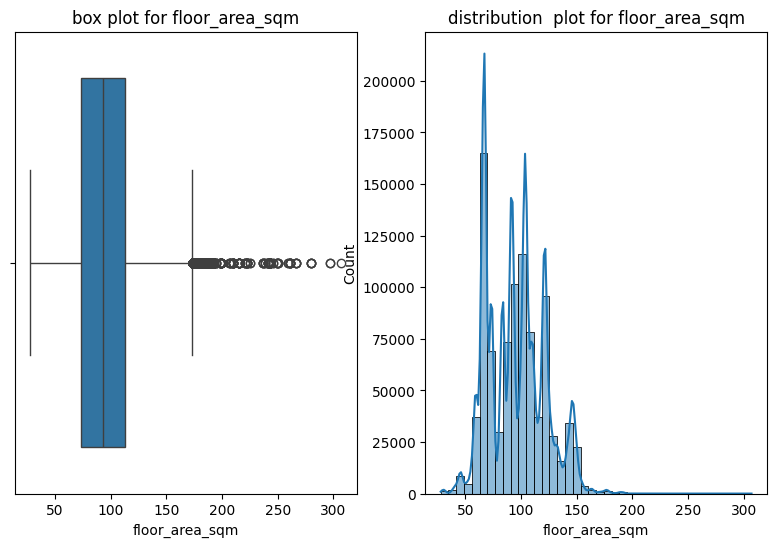

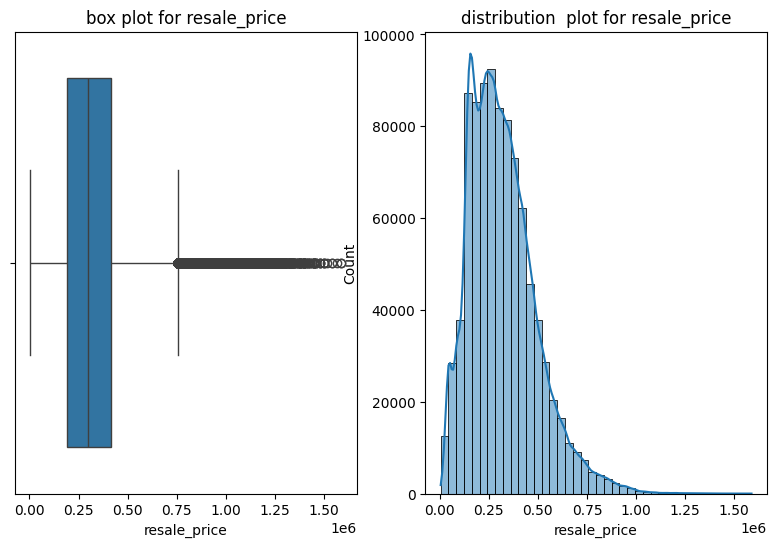

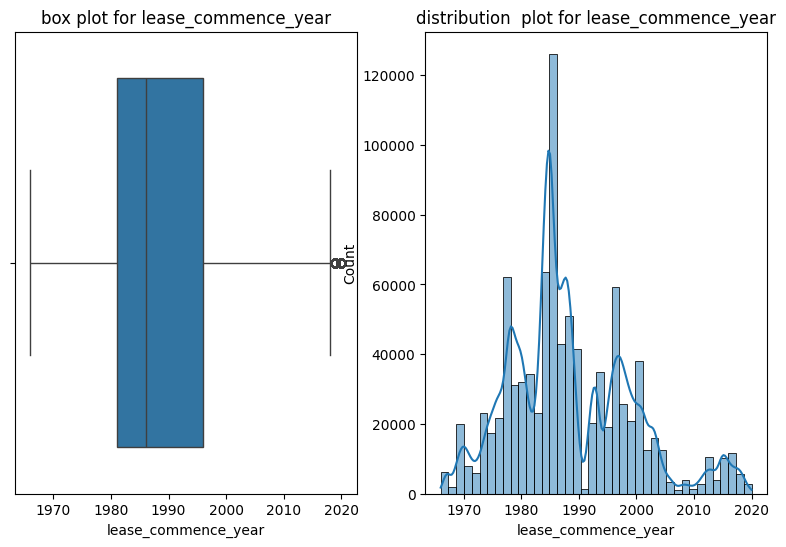

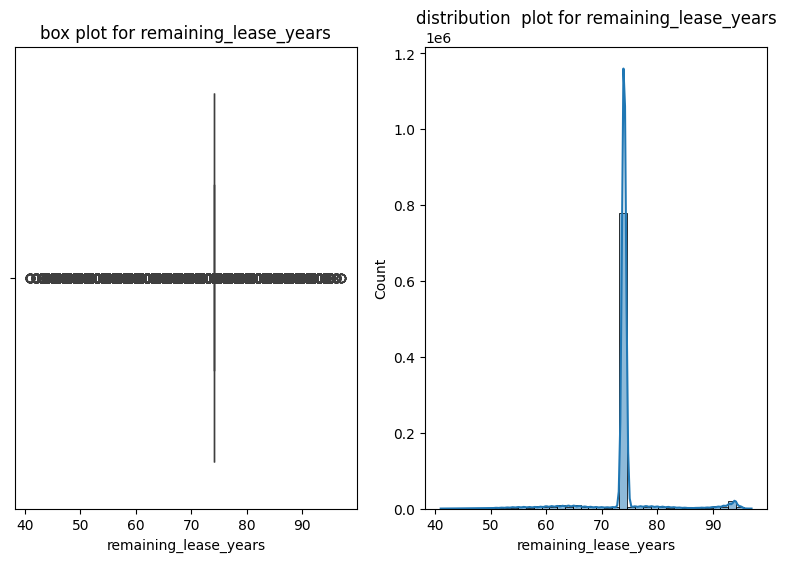

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in ['floor_area_sqm','resale_price','lease_commence_year','remaining_lease_years']:
    plot(df_new_data ,i)

In [39]:
# 'floor_area_sqm','resale_price' this two feature are skewd in data handling log method 


df_new_data['floor_area_sqm'] = np.log(df_new_data['floor_area_sqm'])
df_new_data['resale_price'] = np.log(df_new_data['resale_price'])
df_new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,remaining_lease_years,remaining_lease_months,lease_commence_year
0,0,0,309,ANG MO KIO AVE 1,5,3.433987,7,9.104980,1990,1,74.023682,6.533431,1977
1,0,0,309,ANG MO KIO AVE 1,2,3.433987,7,8.699515,1990,1,74.023682,6.533431,1977
2,0,0,309,ANG MO KIO AVE 1,5,3.433987,7,8.987197,1990,1,74.023682,6.533431,1977
3,0,0,309,ANG MO KIO AVE 1,4,3.433987,7,8.699515,1990,1,74.023682,6.533431,1977
4,0,2,216,ANG MO KIO AVE 1,2,4.290459,20,10.762149,1990,1,74.023682,6.533431,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182350,26,5,328,YISHUN RING RD,2,4.955827,5,13.652992,2024,6,74.023682,6.533431,1988
182351,26,5,723,YISHUN ST 71,5,4.983607,15,13.579788,2024,6,74.023682,6.533431,1986
182352,26,5,826,YISHUN ST 81,5,4.983607,15,13.815511,2024,6,62.000000,8.000000,1988
182353,26,5,826,YISHUN ST 81,2,4.983607,15,13.815511,2024,6,62.000000,8.000000,1988


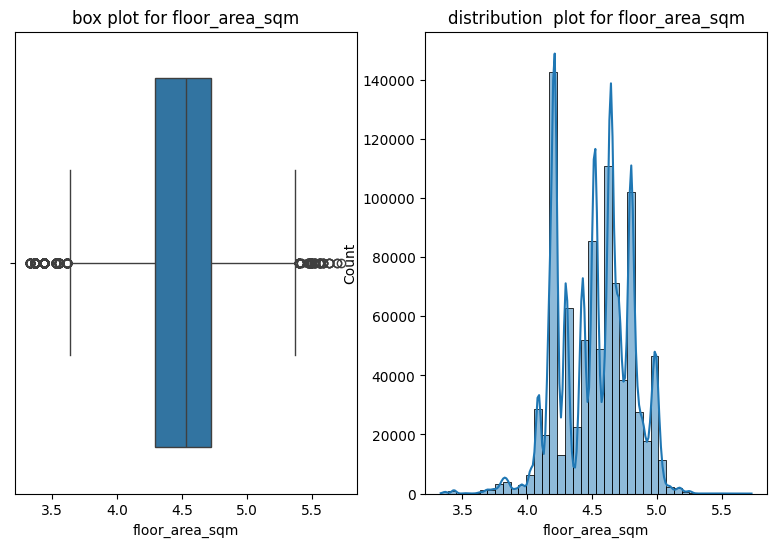

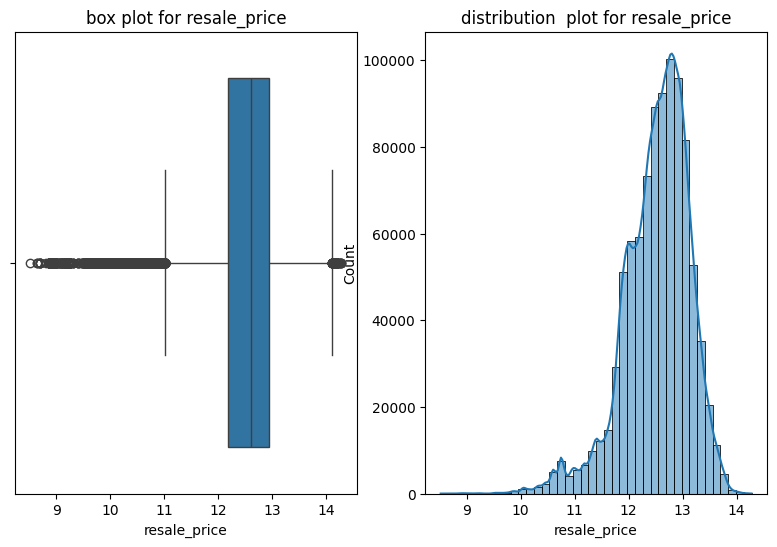

In [40]:
for i in ['floor_area_sqm','resale_price']:
    plot(df_new_data,i)

In [41]:
#using the IQR & Clips  method removing the outliers :
# formula IQR = Q3_Q1
def outlier(df_new_data ,column):
    IQR = df_new_data[column].quantile(0.75)-df_new_data[column].quantile(0.25)
    upper_value = df_new_data[column].quantile(0.75)+1.5*IQR
    lower_value = df_new_data[column].quantile(0.25)-1.5*IQR
    
    df_new_data[column] = df_new_data[column].clip(upper_value,lower_value)

outlier(df_new_data, 'floor_area_sqm')
outlier(df_new_data, 'resale_price')
df_new_data1 = df_new_data.copy()

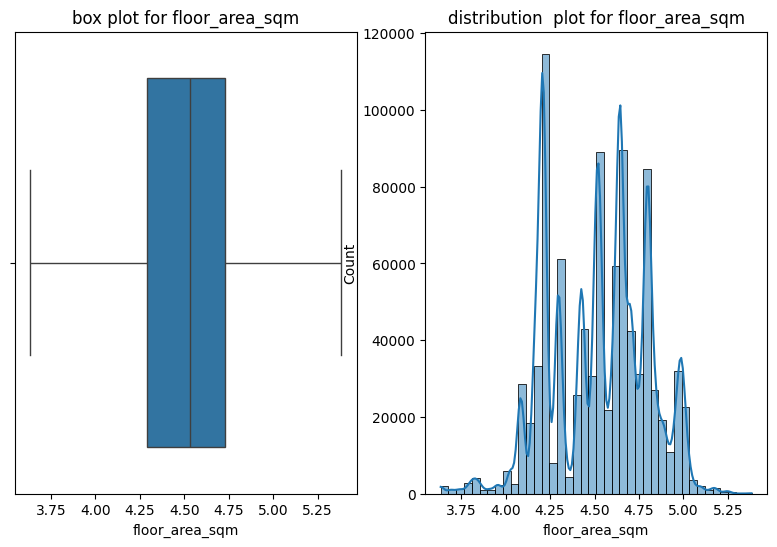

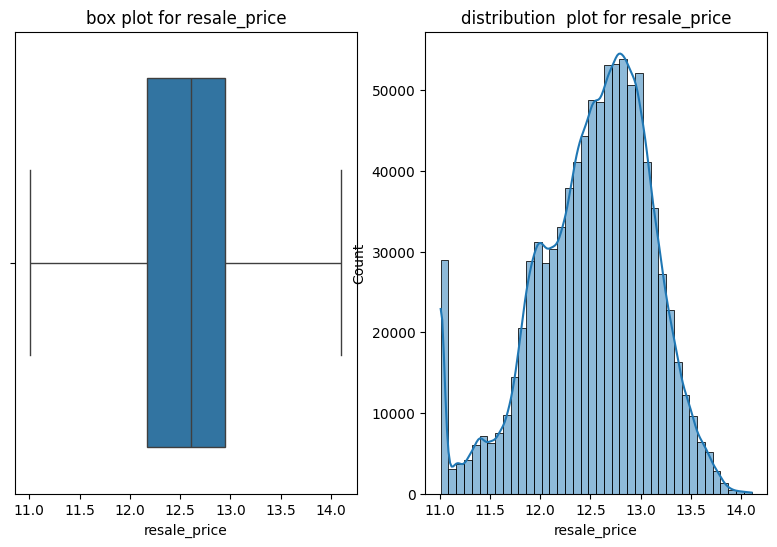

In [42]:
# after IQR using checking the skewness
for i in ['floor_area_sqm','resale_price']:
    plot(df_new_data1,i)

<Axes: xlabel='resale_price', ylabel='flat_model'>

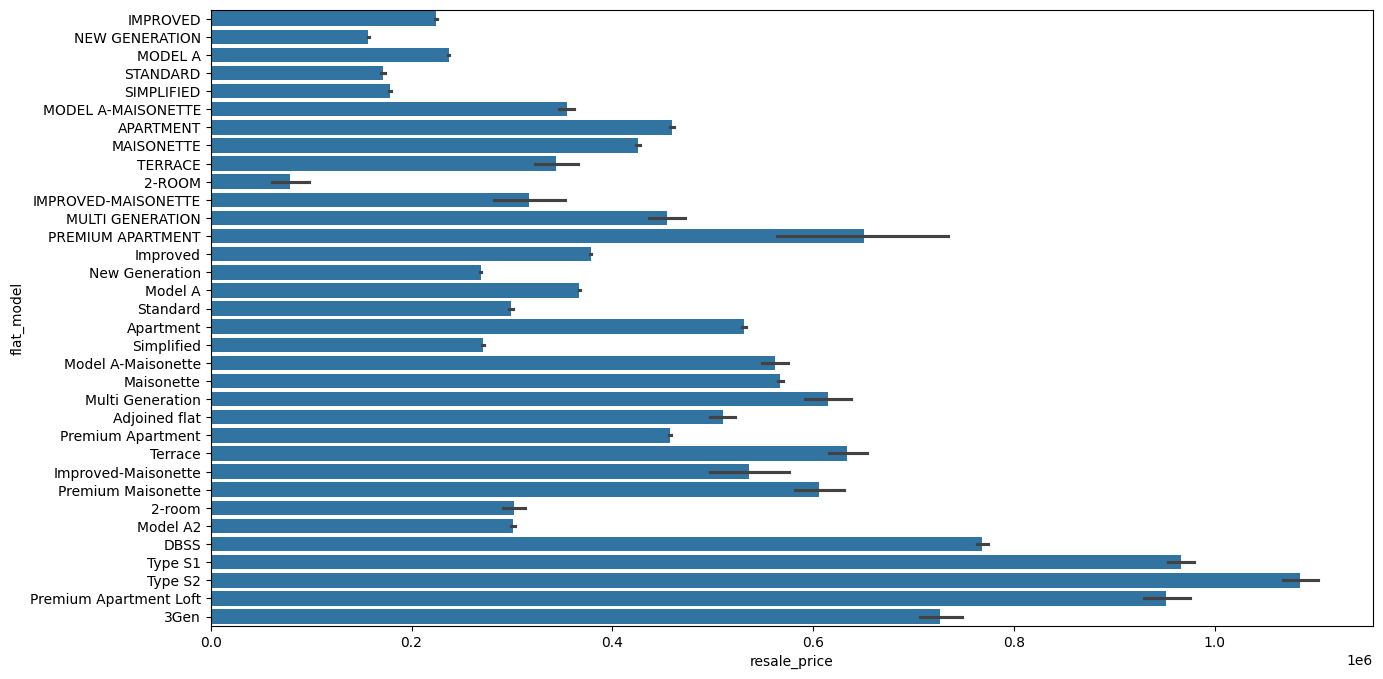

In [44]:
plt.figure(figsize= (15,8))
sns.barplot(x = 'resale_price', y = 'flat_model', data = df )

<Axes: xlabel='resale_price', ylabel='town'>

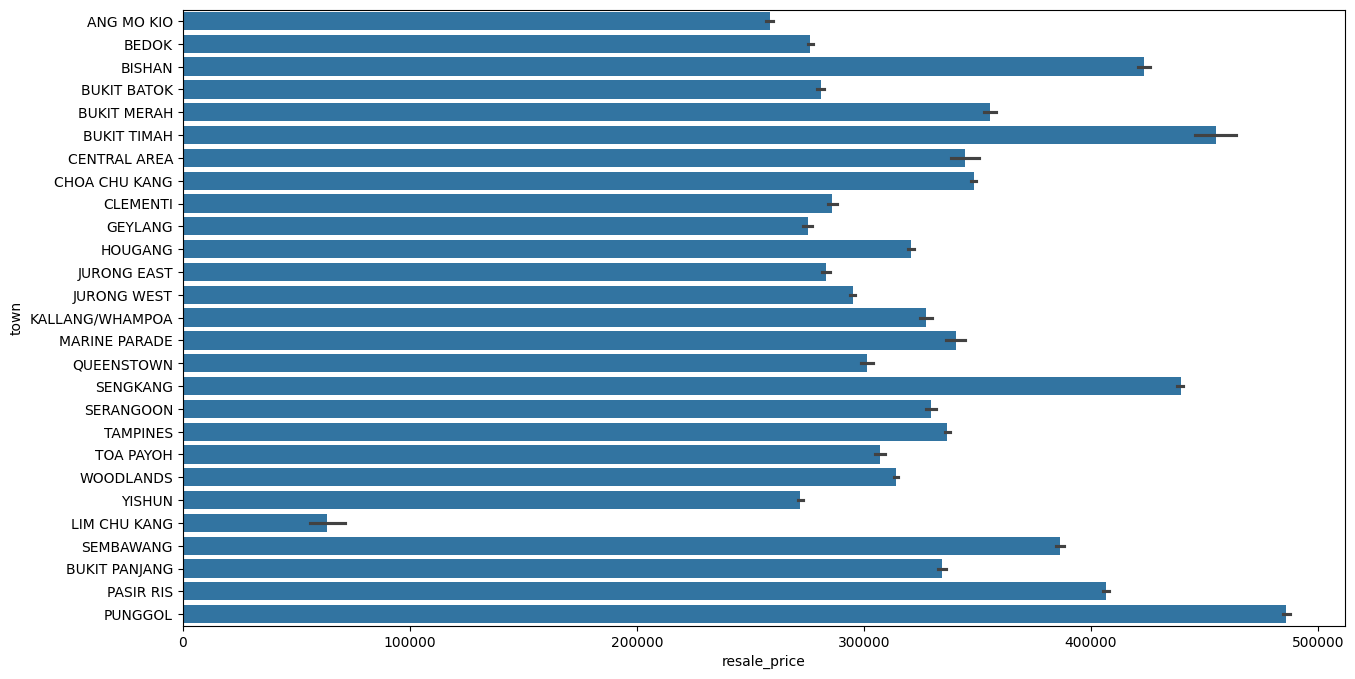

In [46]:
plt.figure(figsize= (15,8))
sns.barplot(x = 'resale_price', y = 'town', data = df )

<Axes: xlabel='resale_price', ylabel='flat_type'>

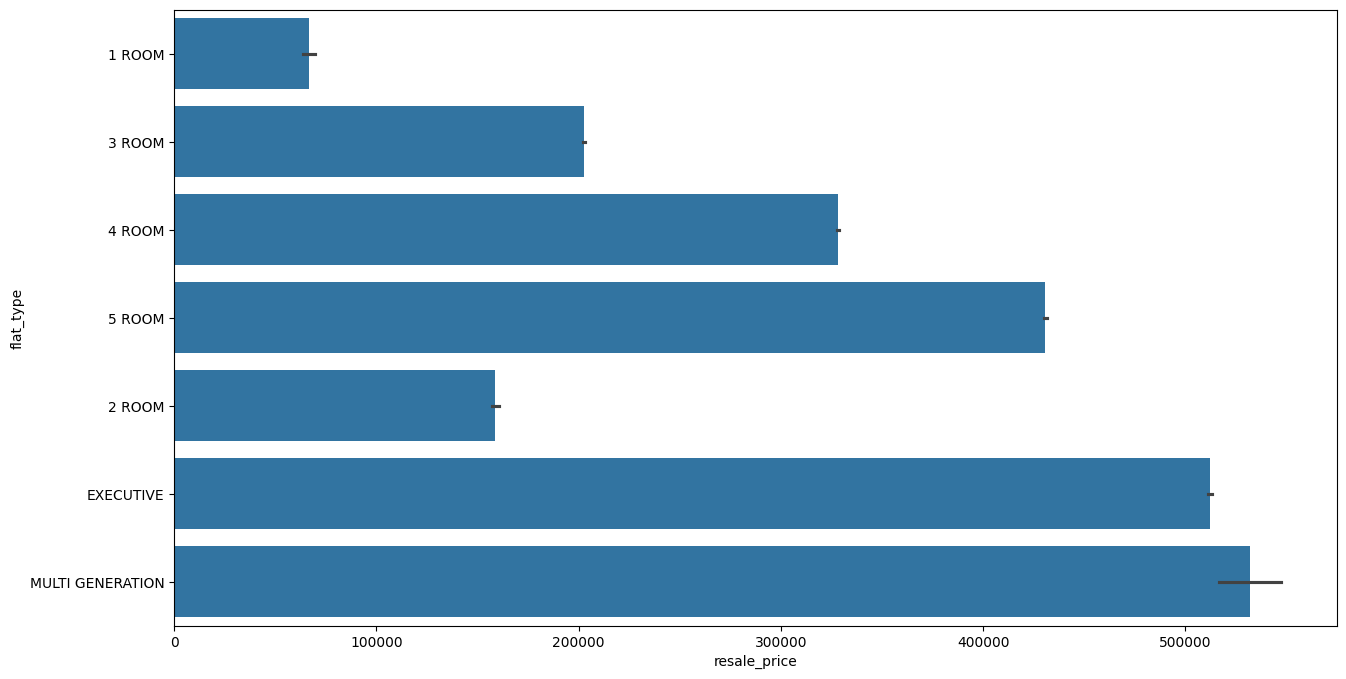

In [47]:
plt.figure(figsize= (15,8))
sns.barplot(x = 'resale_price', y = 'flat_type', data = df )

<Axes: xlabel='resale_price', ylabel='floor_area_sqm'>

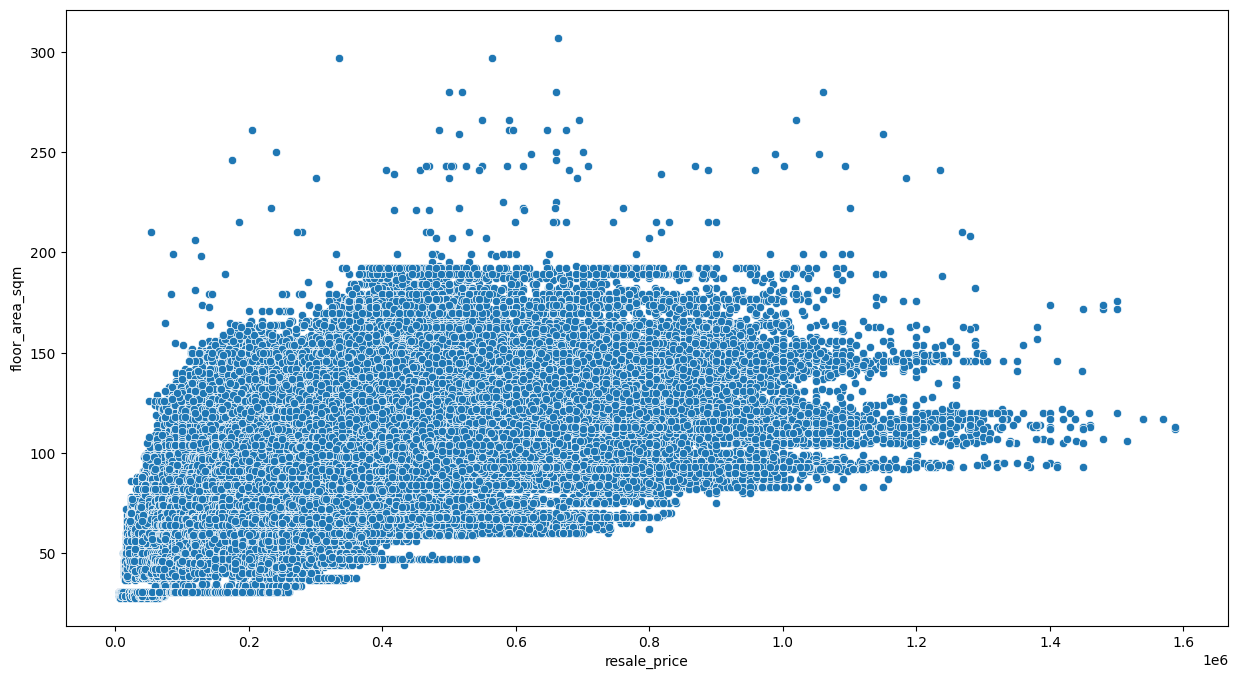

In [48]:
plt.figure(figsize= (15,8))
sns.scatterplot(x = 'resale_price', y = 'floor_area_sqm', data = df )

<Axes: xlabel='lease_commence_year', ylabel='resale_price'>

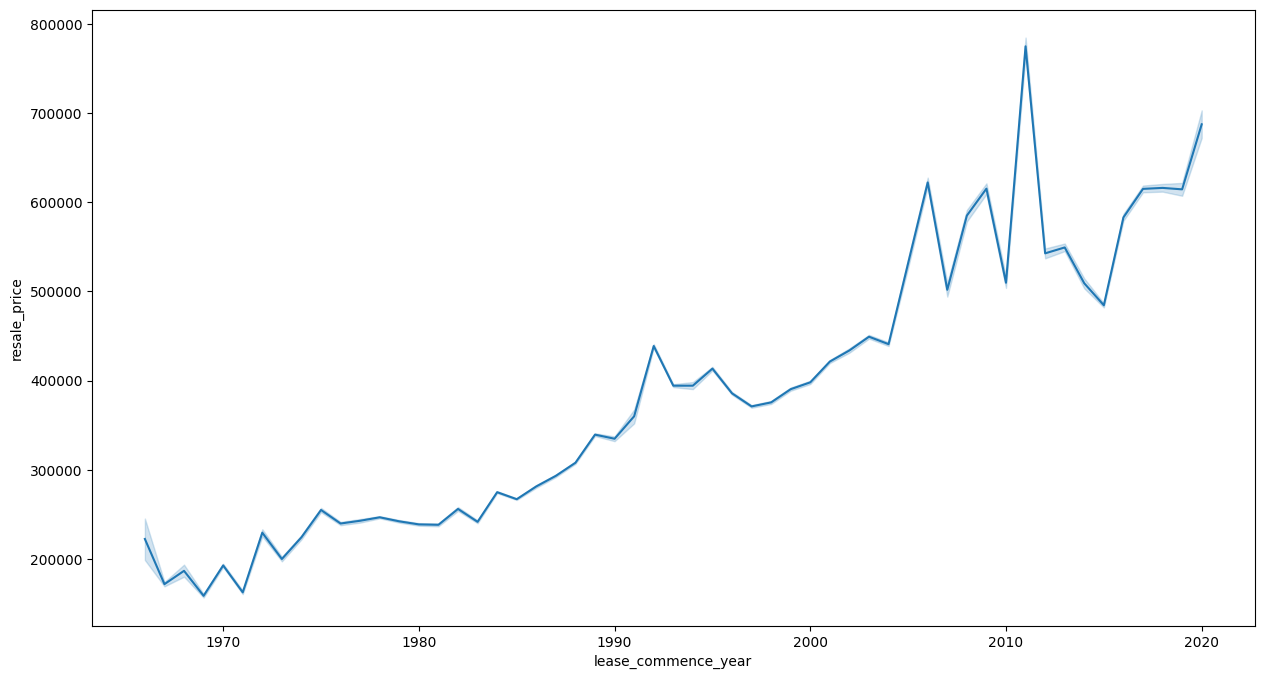

In [49]:
plt.figure(figsize= (15,8))
sns.lineplot(x = 'lease_commence_year', y = 'resale_price', data = df )

<Axes: xlabel='year', ylabel='resale_price'>

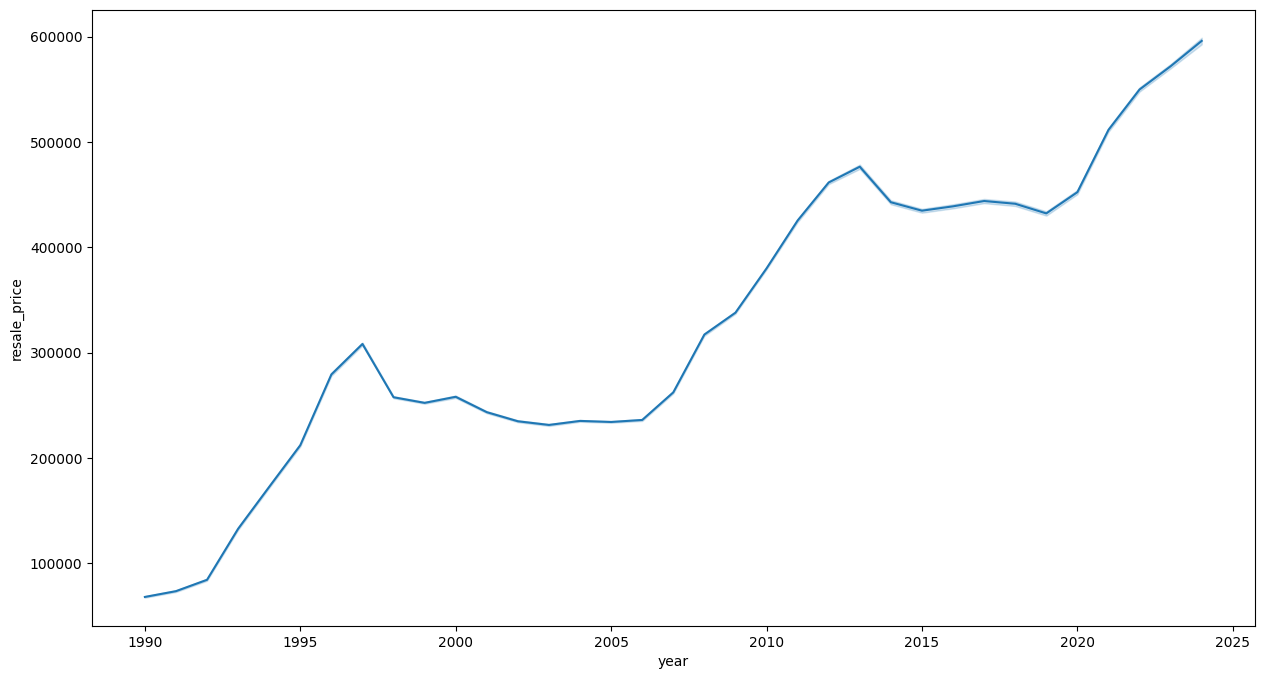

In [50]:
plt.figure(figsize= (15,8))
sns.lineplot(x = 'year', y = 'resale_price', data = df )

<Axes: xlabel='remaining_lease_years', ylabel='resale_price'>

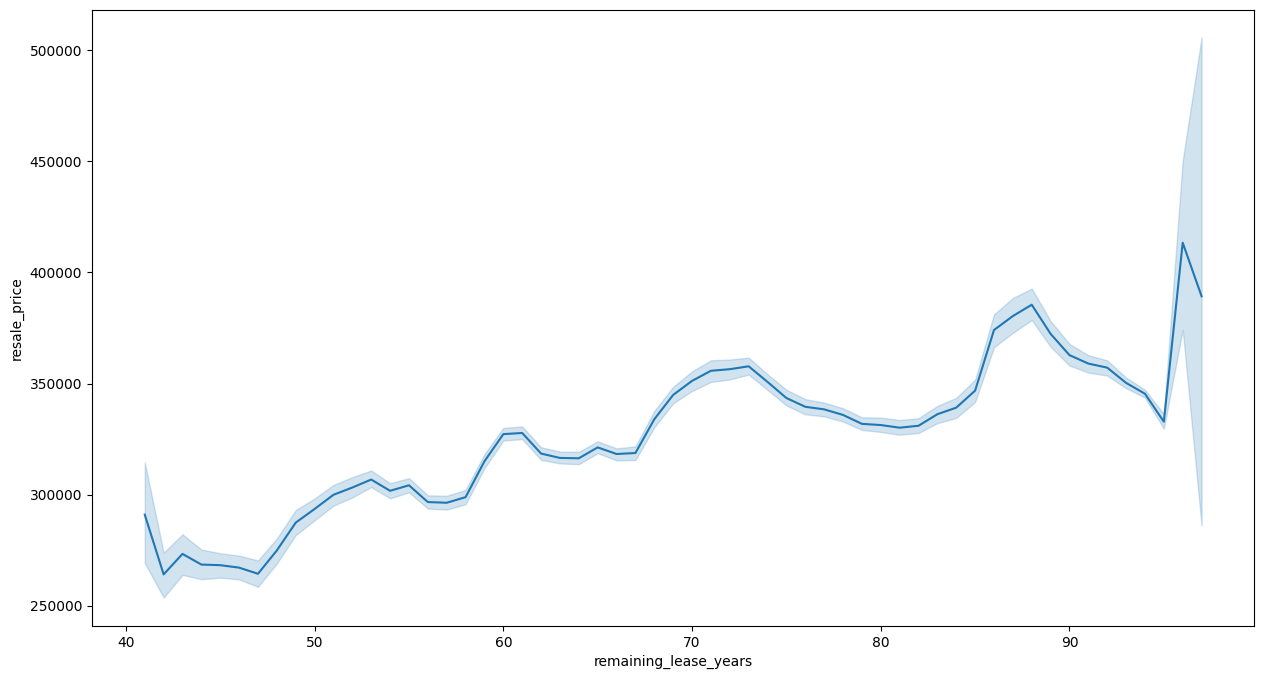

In [51]:
plt.figure(figsize= (15,8))
sns.lineplot(x = 'remaining_lease_years', y = 'resale_price', data = df )

In [52]:
# dropping the irrelvent feature 
df_new_data1.drop(columns=['block','street_name'], inplace = True)
df_new_data1

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,remaining_lease_years,remaining_lease_months,lease_commence_year
0,0,0,5,3.635067,7,11.011259,1990,1,74.023682,6.533431,1977
1,0,0,2,3.635067,7,11.011259,1990,1,74.023682,6.533431,1977
2,0,0,5,3.635067,7,11.011259,1990,1,74.023682,6.533431,1977
3,0,0,4,3.635067,7,11.011259,1990,1,74.023682,6.533431,1977
4,0,2,2,4.290459,20,11.011259,1990,1,74.023682,6.533431,1976
...,...,...,...,...,...,...,...,...,...,...,...
182350,26,5,2,4.955827,5,13.652992,2024,6,74.023682,6.533431,1988
182351,26,5,5,4.983607,15,13.579788,2024,6,74.023682,6.533431,1986
182352,26,5,5,4.983607,15,13.815511,2024,6,62.000000,8.000000,1988
182353,26,5,2,4.983607,15,13.815511,2024,6,62.000000,8.000000,1988


In [53]:
df_new_data1.dtypes

town                        int32
flat_type                   int32
storey_range                int32
floor_area_sqm            float64
flat_model                  int32
resale_price              float64
year                        int32
month_of_year               int32
remaining_lease_years     float64
remaining_lease_months    float64
lease_commence_year         int32
dtype: object

<Axes: >

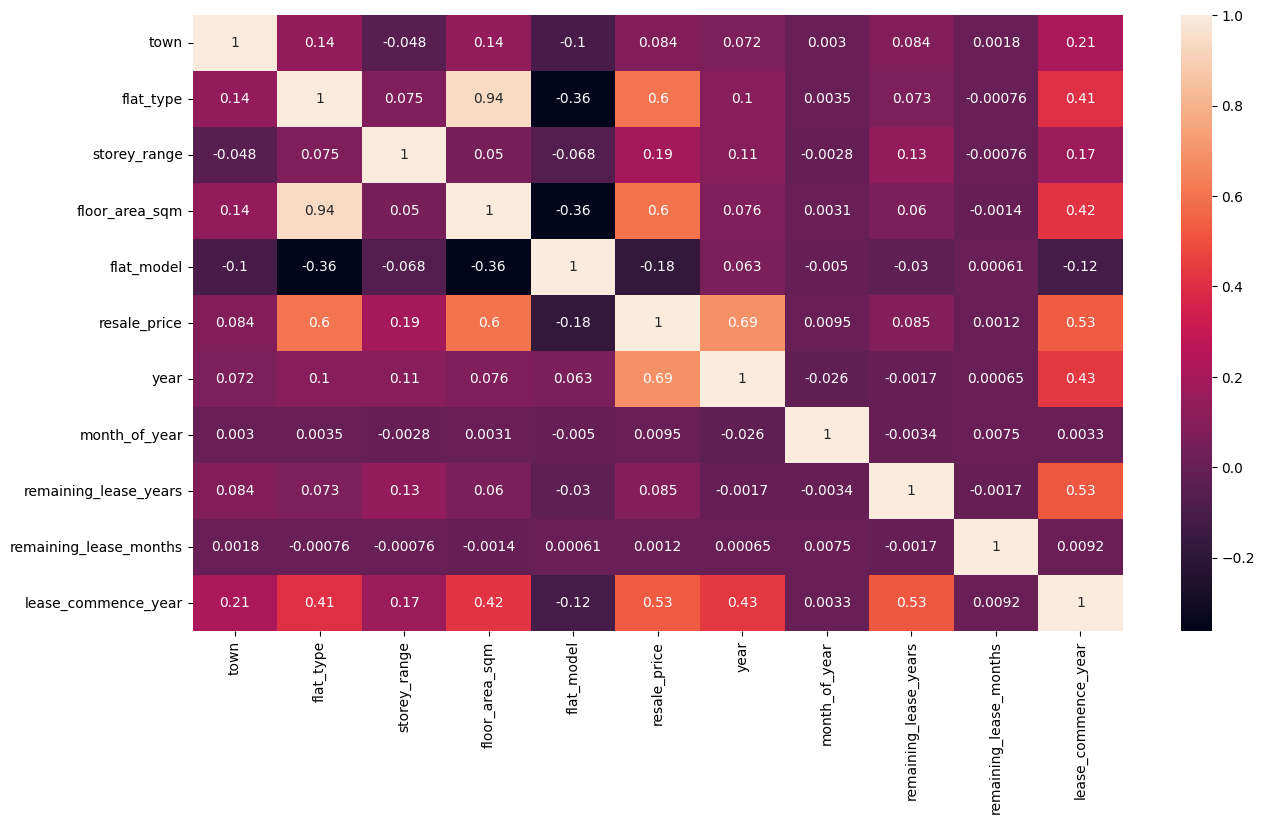

In [54]:
# Need to verify any columns are highly correlated using Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df_new_data1.corr(), annot = True)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [56]:
df_new_data1.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'year', 'month_of_year', 'remaining_lease_years',
       'remaining_lease_months', 'lease_commence_year'],
      dtype='object')

In [57]:
X = df_new_data1[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'year', 'month_of_year', 'remaining_lease_years',
       'remaining_lease_months', 'lease_commence_year']]
y = df_new_data1[['resale_price']]

In [59]:
#standardize the features of a dataset
encoder = StandardScaler()

encoder.fit_transform(X)

array([[-1.55245018e+00, -3.17797073e+00,  5.96356836e-01, ...,
         1.00628512e-14, -7.58842293e-16, -1.05733566e+00],
       [-1.55245018e+00, -3.17797073e+00, -5.29373307e-01, ...,
         1.00628512e-14, -7.58842293e-16, -1.05733566e+00],
       [-1.55245018e+00, -3.17797073e+00,  5.96356836e-01, ...,
         1.00628512e-14, -7.58842293e-16, -1.05733566e+00],
       ...,
       [ 1.40373265e+00,  2.09418346e+00,  5.96356836e-01, ...,
        -2.12852288e+00,  1.25300807e+00, -2.71243292e-02],
       [ 1.40373265e+00,  2.09418346e+00, -5.29373307e-01, ...,
        -2.12852288e+00,  1.25300807e+00, -2.71243292e-02],
       [ 1.40373265e+00,  3.14861430e+00,  2.21113455e-01, ...,
        -2.12852288e+00,  3.98627607e-01, -1.20779905e-01]])

In [60]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [61]:
RFR = RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 
RFR.fit(X_train,y_train)

y_pred_train = RFR.predict(X_train)
y_pred_test = RFR.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 0.008414861063008735
Mean Absolute Error: 0.06693712600364585
Root Mean Squared Error: 0.09173255181781838
0.9747867428157615


In [62]:
LR = LinearRegression()

# fitting the model: 
LR.fit(X_train,y_train)

y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 0.07019046465721829
Mean Absolute Error: 0.20764931808773804
Root Mean Squared Error: 0.26493483096266957
0.7896899040837073


In [64]:
DTR = DecisionTreeRegressor()

# fitting the model: 
DTR.fit(X_train,y_train)

y_pred_train = DTR.predict(X_train)
y_pred_test = DTR.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 0.010476794384253769
Mean Absolute Error: 0.07024824131058578
Root Mean Squared Error: 0.10235621321763408
0.9686086188115711


In [65]:
# manually passed the user input and predict the selling price

user_data = np.array([[0,1,3,3.785069,5,2017,1,61.000000,4.000000,1979]])
y_prediction = RFR.predict(user_data)
y_prediction[0]

12.331221435343153

In [66]:
# using Inverse Log Transformation to convert the value to original re sale price of the data (exp)
np.exp(y_prediction[0])

226663.41331138188

In [67]:
#Save the regression model by using pickle

with open(r"F:\DS\MDTM20\VS Code\Singapore\resale_final_model.pkl", 'wb') as file:
    pickle.dump(RFR, file)

#TOWN

'ANG MO KIO': 0
'BEDOK': 1
'BISHAN': 2
'BUKIT BATOK': 3
'BUKIT MERAH': 4
'BUKIT PANJANG': 5
'BUKIT TIMAH': 6
'CENTRAL AREA': 7
'CHOA CHU KANG': 8
'CLEMENTI': 9
'GEYLANG': 10
'HOUGANG': 11
'JURONG EAST': 12
'JURONG WEST': 13
'KALLANG/WHAMPOA': 14
'MARINE PARADE': 15
'PASIR RIS': 16
'PUNGGOL': 17
'QUEENSTOWN': 18
'SEMBAWANG': 19
'SENGKANG': 20
'SERANGOON': 21
'TAMPINES': 22
'TOA PAYOH': 23
'WOODLANDS': 24
'YISHUN': 25        

#FLAT_TYPE

'1 ROOM': 0
'2 ROOM': 1
'3 ROOM': 2
'4 ROOM': 3
'5 ROOM': 4
'EXECUTIVE': 5
'MULTI-GENERATION': 6

#STOREY_RANGE

'01 TO 03': 0
'04 TO 06': 1
'07 TO 09': 2
'10 TO 12': 3
'13 TO 15': 4
'16 TO 18': 5
'19 TO 21': 6
'22 TO 24': 7
'25 TO 27': 8
'28 TO 30': 9
'31 TO 33': 10
'34 TO 36': 11
'37 TO 39': 12
'40 TO 42': 13
'43 TO 45': 14
'46 TO 48': 15
'49 TO 51': 16

#FLAT_MODEL

'2-room': 0
'3Gen': 1
'Adjoined flat': 2
'Apartment': 3
'DBSS': 4
'Improved': 5
'Improved-Maisonette': 6
'Maisonette': 7
'Model A': 8
'Model A-Maisonette': 9
'Model A2': 10
'Multi Generation': 11
'New Generation': 12
'Premium Apartment': 13
'Premium Apartment Loft': 14
'Premium Maisonette': 15
'Simplified': 16
'Standard': 17
'Terrace': 18
'Type S1': 19
'Type S2': 20